In [88]:
import pandas as pd
import numpy as np 
import requests
import json
import tweepy 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gathering Data

In [89]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r

In [4]:
open('image_predictions.tsv', mode='wb').write(r.content)

In [90]:
pred = pd.read_csv('image_predictions.tsv',sep='\t') #predictions
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
auth = tweepy.OAuthHandler("""consumer_key""", """consumer_secret""")

## Do Not Include Your API Keys, Secrets, and Tokens in Your Submission
Do not include your API keys, secrets, and tokens in your project submission. This is standard practice for APIs and public code.

In [7]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [8]:
key = auth.access_token

In [9]:
secret = auth.access_token_secret

In [10]:
auth.set_access_token(key, secret)

In [11]:
api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

https://stackoverflow.com/questions/24002536/get-tweepy-search-results-as-json

In [12]:
valid = []
deleted = []
for x in pred['tweet_id']:
    try:
        valid.append(api.get_status(x, tweet_mode='extended'))
    except:
        deleted.append(x)

In [13]:
with open('tweet_json.txt', 'w') as outfile:
    outfile.write(json.dumps(valid, indent=4))

In [14]:
tweet_list=[]
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for x in data:
        tweet_id = x['id']
        retweet_count = x['retweet_count']
        favorite_count = x['favorite_count']
        tweet_list.append({
            'tweet_id': str(tweet_id),
            'retweet_count': int(retweet_count),
            'favorite_count': int(favorite_count)
        })
    df = pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])

In [15]:
df.head()

In [16]:
df.to_csv('tweet_json.csv',index=False)

In [91]:
tweet_json = pd.read_csv('tweet_json.csv')

In [92]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,445,2343
1,666029285002620928,41,118
2,666033412701032449,39,107
3,666044226329800704,123,262
4,666049248165822465,39,94


# Assessing Data

In [6]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,666020888022790149,445,2343
1,666029285002620928,41,118
2,666033412701032449,39,107
3,666044226329800704,123,262
4,666049248165822465,39,94


In [94]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
archive.info()

In [ ]:
pred.info()

In [ ]:
tweet_json.info()

In [ ]:
archive['tweet_id'].duplicated().sum()

In [ ]:
archive['rating_numerator'].value_counts()

In [ ]:
#from (https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
pd.set_option('display.max_colwidth', -1)
print(archive[archive['rating_numerator'] == 75]['text'])
print(archive[archive['rating_numerator'] == 27]['text'])
print(archive[archive['rating_numerator'] == 1]['text'])

In [ ]:
archive['rating_denominator'].value_counts()

In [ ]:
print(archive[archive['rating_denominator'] == 0]['text'])
print(archive[archive['rating_denominator'] == 7]['text'])
print(archive[archive['rating_denominator'] == 11]['text'])

In [ ]:
archive[archive['name'].notnull()]

In [ ]:
archive.iloc[2327]['name']

In [ ]:
archive[archive['name'].str.len()<3]['name']

-Missing names are "None" instead of null
-Some names are invalid

In [9]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
pred['jpg_url'].duplicated().sum()

66

In [11]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Issues

## Quality
- Change Timestamp to datetime64 instead of String
- Fix numerator and denominator's wrong values
- Drop useless columns
- Change missing name values from "NaN" to None
- Change missing floofer, pupper, doggo and puppo from "NaN" to None
- Reduce dogs with multiple stage_name values to 1 stage name
- Drop invalid names
- Drop duplicated images
- Change source values to ('Iphone' , 'Vine' , 'Twitter_Web_Client' , 'TweetDeck')

## Tidiness
- Combine the doggo, floofer, pupper and puppo columns into "dog_stage" column with type String
- Merge all the dataframes


# Cleaning

### Define

- Change Timestamp to datetime64

### Code

In [13]:
clean_archive = archive.copy()
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

### Test

In [14]:
clean_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [15]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

- Fix numerator and denominator's wrong values

### Code

In [16]:
clean_archive.loc[clean_archive['rating_denominator'] != 10, 'rating_denominator'] = 10

for the numerator, the false ones seem to be the ones that aren't out of 10.

In [17]:
clean_archive[~clean_archive['text'].str.contains(pat='/10')].text

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
902     Why does this never happen at my front door......
1120    Say hello to this unbelievably well behaved sq...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1663    I'm aware that I could've said 20/16, but here...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object

In [18]:
temp = clean_archive[~clean_archive['text'].str.contains(pat='/10')].index
clean_archive.drop(index=temp,inplace=True)
clean_archive.reset_index(drop=True)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Test

In [19]:
clean_archive[clean_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
clean_archive[~clean_archive['text'].str.contains(pat='/10')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

- Drop useless columns

### Code

In [21]:
clean_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

### Test

In [22]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2340 non-null int64
timestamp             2340 non-null datetime64[ns]
source                2340 non-null object
text                  2340 non-null object
expanded_urls         2284 non-null object
rating_numerator      2340 non-null int64
rating_denominator    2340 non-null int64
name                  2340 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 237.7+ KB


### Define

- Change missing name values from "NaN" to None

### Code

In [23]:
clean_archive.loc[clean_archive['name'] == 'None', 'name'] = np.NaN

### Test

In [24]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2340 non-null int64
timestamp             2340 non-null datetime64[ns]
source                2340 non-null object
text                  2340 non-null object
expanded_urls         2284 non-null object
rating_numerator      2340 non-null int64
rating_denominator    2340 non-null int64
name                  1608 non-null object
doggo                 2340 non-null object
floofer               2340 non-null object
pupper                2340 non-null object
puppo                 2340 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 237.7+ KB


### Define

- Change missing floofer, pupper, doggo and puppo from "NaN" to None

### Code

In [25]:
clean_archive.loc[clean_archive['floofer'] == 'None', 'floofer'] = np.NaN
clean_archive.loc[clean_archive['doggo'] == 'None', 'doggo'] = np.NaN
clean_archive.loc[clean_archive['puppo'] == 'None', 'puppo'] = np.NaN
clean_archive.loc[clean_archive['pupper'] == 'None', 'pupper'] = np.NaN

### Test

In [26]:
clean_archive[clean_archive['floofer'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

-Reduce dogs with multiple stage_name values to 1 stage name

### Code

In [27]:
print(clean_archive.query('floofer == "floofer" & doggo == "doggo"')['tweet_id'].count())
print(clean_archive.query('floofer == "floofer" & puppo == "puppo"')['tweet_id'].count())
print(clean_archive.query('floofer == "floofer" & pupper == "pupper"')['tweet_id'].count())
print(clean_archive.query('puppo == "puppo" & doggo == "doggo"')['tweet_id'].count())
print(clean_archive.query('puppo == "puppo" & pupper == "pupper"')['tweet_id'].count())
print(clean_archive.query('doggo == "doggo" & pupper == "pupper"')['tweet_id'].count())

1
0
0
1
0
12


12 doggo/pupper<br>
1 doggo/puppo<br>
1 doggo/floofer<br>
since doggo is common between all of them we will drop it

In [28]:
clean_archive.loc[(clean_archive.doggo == 'doggo') & (clean_archive.floofer == 'floofer'), 'doggo'] = np.nan
clean_archive.loc[(clean_archive.doggo == 'doggo') & (clean_archive.puppo == 'puppo'), 'doggo'] = np.nan
clean_archive.loc[(clean_archive.doggo == 'doggo') & (clean_archive.pupper == 'pupper'), 'doggo'] = np.nan

### Test

In [29]:
print(clean_archive.query('floofer == "floofer" & doggo == "doggo"')['tweet_id'].count())
print(clean_archive.query('puppo == "puppo" & doggo == "doggo"')['tweet_id'].count())
print(clean_archive.query('doggo == "doggo" & pupper == "pupper"')['tweet_id'].count())

0
0
0


### Define

- Drop invalid names

### Code

In [30]:
clean_archive['name'].value_counts()

a               54
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
an               7
Bailey           7
Toby             7
Buddy            7
Daisy            7
Dave             6
Jax              6
Scout            6
Stanley          6
Leo              6
Jack             6
Rusty            6
Koda             6
Bella            6
Milo             6
Oscar            6
Bentley          5
Larry            5
                ..
Ben              1
Florence         1
Walker           1
Scruffers        1
Sweets           1
Vinscent         1
Rueben           1
Tess             1
Ralf             1
Vinnie           1
Longfellow       1
Charleson        1
unacceptable     1
Sundance         1
Zara             1
Saydee           1
Todo             1
Samsom           1
Trevith          1
Alfy             1
Kanu             1
Jeffrie     

- names that are less than 2 characters 
- 'the'
- 'very'

In [31]:
clean_archive.drop(clean_archive[clean_archive['name'].str.len()<3].index,inplace=True)
clean_archive.drop(clean_archive[clean_archive['name'] == 'the'].index,inplace=True)
clean_archive.drop(clean_archive[clean_archive['name'] == 'very'].index,inplace=True)

### Test

In [32]:
clean_archive['name'].value_counts()

Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Sadie            8
Toby             7
Buddy            7
Bailey           7
Daisy            7
Stanley          6
Jax              6
Rusty            6
Milo             6
Bella            6
Scout            6
Oscar            6
Dave             6
Leo              6
Jack             6
Koda             6
Sammy            5
Larry            5
Alfie            5
Chester          5
Bentley          5
George           5
                ..
Blipson          1
Ben              1
Florence         1
Walker           1
Scruffers        1
Blue             1
Rumpole          1
Tess             1
Ralf             1
Vinnie           1
Longfellow       1
Charleson        1
unacceptable     1
Sundance         1
Zara             1
Saydee           1
Todo             1
Samsom           1
Trevith          1
Alfy             1
Kanu             1
Jeffrie     

### Define

- Drop duplicated images

### Code

In [33]:
clean_pred = pred.copy()
clean_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
clean_pred.drop_duplicates(subset=['jpg_url'],keep='first',inplace=True)

### Test

In [35]:
clean_pred['jpg_url'].duplicated().sum()

0

### Define

- Change source values to ('Iphone' , 'Vine' , 'Twitter_Web_Client' , 'TweetDeck')

### Code

In [36]:
clean_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2120
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [37]:
clean_archive.loc[clean_archive['source'].str.contains('Vine'),'source'] = 'vine'
clean_archive.loc[clean_archive['source'].str.contains('Twitter for iPhone'),'source'] = 'iphone'
clean_archive.loc[clean_archive['source'].str.contains('Twitter Web Client'),'source'] = 'twitter_web_client'
clean_archive.loc[clean_archive['source'].str.contains('TweetDeck'),'source'] = 'tweetdeck'

### Test

In [38]:
clean_archive['source'].value_counts()

iphone                2120
vine                    90
twitter_web_client      30
tweetdeck                9
Name: source, dtype: int64

### Define

- Combine the doggo, floofer, pupper and puppo columns into "dog_stage" column with type String

### Code

In [39]:
clean_archive['dog_stage'] = np.nan

In [40]:
clean_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN


In [41]:
clean_archive.loc[clean_archive['floofer']=='floofer','dog_stage']='floofer'
clean_archive.loc[clean_archive['doggo']=='doggo','dog_stage']='doggo'
clean_archive.loc[clean_archive['pupper']=='pupper','dog_stage']='pupper'
clean_archive.loc[clean_archive['puppo']=='puppo','dog_stage']='puppo'

In [42]:
clean_archive.drop(columns=['floofer','doggo','pupper','puppo'],inplace=True)

### Test

In [43]:
clean_archive.loc[clean_archive.dog_stage.notnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32,iphone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04,iphone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,iphone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,iphone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,iphone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer
49,882762694511734784,2017-07-06 00:46:41,iphone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
71,878776093423087618,2017-06-25 00:45:22,iphone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
78,877611172832227328,2017-06-21 19:36:23,iphone,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,pupper
82,876838120628539392,2017-06-19 16:24:33,iphone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,pupper


### Define

- Merge all the dataframes

### Code

In [44]:
clean_archive = pd.merge(clean_archive,clean_pred,on=['tweet_id'], how='left')
clean_archive = pd.merge(clean_archive,tweet_json,on=['tweet_id'], how='left')

In [45]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7430.0,35231.0
1,892177421306343426,2017-08-01 00:17:27,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5525.0,30495.0
2,891815181378084864,2017-07-31 00:18:03,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3647.0,22933.0
3,891689557279858688,2017-07-30 15:58:51,iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7607.0,38514.0
4,891327558926688256,2017-07-29 16:00:24,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8189.0,36787.0


In [46]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249 entries, 0 to 2248
Data columns (total 22 columns):
tweet_id              2249 non-null int64
timestamp             2249 non-null datetime64[ns]
source                2249 non-null object
text                  2249 non-null object
expanded_urls         2193 non-null object
rating_numerator      2249 non-null int64
rating_denominator    2249 non-null int64
name                  1517 non-null object
dog_stage             370 non-null object
jpg_url               1911 non-null object
img_num               1911 non-null float64
p1                    1911 non-null object
p1_conf               1911 non-null float64
p1_dog                1911 non-null object
p2                    1911 non-null object
p2_conf               1911 non-null float64
p2_dog                1911 non-null object
p3                    1911 non-null object
p3_conf               1911 non-null float64
p3_dog                1911 non-null object
retweet_count         195

In [47]:
clean_archive.dropna(subset=['jpg_url','retweet_count'],inplace=True)
#it seems like this step deletes all the rows with the source='vine'
#maybe its because vines dont include pictures, only videos

### Test

In [48]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2248
Data columns (total 22 columns):
tweet_id              1902 non-null int64
timestamp             1902 non-null datetime64[ns]
source                1902 non-null object
text                  1902 non-null object
expanded_urls         1902 non-null object
rating_numerator      1902 non-null int64
rating_denominator    1902 non-null int64
name                  1353 non-null object
dog_stage             300 non-null object
jpg_url               1902 non-null object
img_num               1902 non-null float64
p1                    1902 non-null object
p1_conf               1902 non-null float64
p1_dog                1902 non-null object
p2                    1902 non-null object
p2_conf               1902 non-null float64
p2_dog                1902 non-null object
p3                    1902 non-null object
p3_conf               1902 non-null float64
p3_dog                1902 non-null object
retweet_count         190

# Storing, Analyzing, and Visualizing

In [49]:
clean_archive.to_csv('twitter_archive_master.csv')

In [50]:
sns.set_palette(sns.color_palette('Accent'))

## The most common source used

In [51]:
counts = clean_archive['source'].value_counts()

In [52]:
labels=clean_archive['source'].unique()

<Container object of 3 artists>

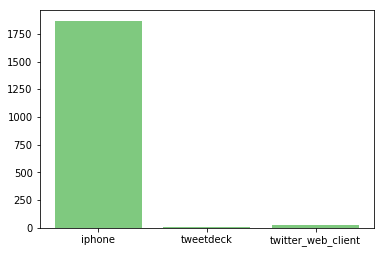

In [53]:
plt.bar(labels, counts)

insight: The most used source appears to be the Iphone at 1867 tweets where as the other sources are less than 50 tweets.

## The most favourited dog breed

In [54]:
x = clean_archive.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)[:10]
labels = clean_archive.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)[:10].index

([<matplotlib.patches.Wedge at 0x7f2b03069dd8>,
 [Text(1.5384,1.57268,'golden_retriever'),
  Text(-1.08521,1.91372,'Labrador_retriever'),
  Text(-2.187,0.23878,'Pembroke'),
  Text(-1.72903,-1.36031,'Chihuahua'),
  Text(-0.769263,-2.06112,'French_bulldog'),
  Text(0.193555,-2.19147,'Samoyed'),
  Text(1.05946,-1.9281,'chow'),
  Text(1.64235,-1.46379,'cocker_spaniel'),
  Text(1.99617,-0.924817,'pug'),
  Text(2.17738,-0.314697,'Pomeranian')],
 [Text(0.839129,0.857824,'25.35'),
  Text(-0.591932,1.04385,'15.72'),
  Text(-1.19291,0.130244,'14.40'),
  Text(-0.94311,-0.741986,'10.28'),
  Text(-0.419598,-1.12425,'7.13'),
  Text(0.105575,-1.19535,'7.04'),
  Text(0.577885,-1.05169,'6.14'),
  Text(0.895829,-0.79843,'4.69'),
  Text(1.08882,-0.504446,'4.67'),
  Text(1.18766,-0.171653,'4.57')])

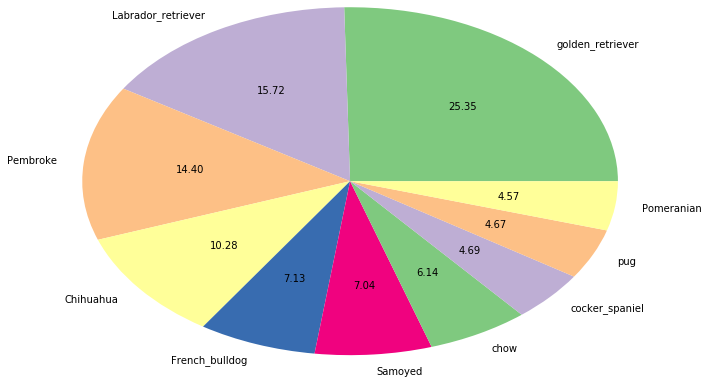

In [55]:
plt.pie(x,radius=2,labels = labels, autopct= '%.2f')

Insight: The most favourited dog breed based on our dataframe seems to be the Golden retriever, followed by the labrador and pembroke.

In [85]:
clean_archive[clean_archive['p1']=='golden_retriever'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.330000e+02,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,7.584279e+17,11.563910,10.0,1.315789,0.725430,0.112937,0.044309,3188.112782,11385.421053
std,6.801211e+16,1.333447,0.0,0.643951,0.223609,0.097666,0.047392,3866.948256,12167.765949
min,6.663454e+17,5.000000,10.0,1.000000,0.140394,0.001948,0.000453,44.000000,174.000000
25%,6.998018e+17,11.000000,10.0,1.000000,0.605304,0.036477,0.008786,1028.000000,3178.000000
50%,7.548566e+17,12.000000,10.0,1.000000,0.784873,0.091992,0.024123,1976.000000,7386.000000
75%,8.131876e+17,12.000000,10.0,1.000000,0.908784,0.173224,0.071732,3724.000000,14820.000000
max,8.895311e+17,14.000000,10.0,4.000000,0.993830,0.454937,0.203163,23850.000000,76862.000000


In [87]:
clean_archive[clean_archive['favorite_count']==76862]['jpg_url']

114    https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
Name: jpg_url, dtype: object

## The most common false predictions in the dog prediciton algorithim

In [ ]:
#clean_archive.loc[clean_archive['p1_dog']==False]['p1']
p1=clean_archive[clean_archive['p1_dog']==False]['p1']
p2=clean_archive[clean_archive['p2_dog']==False]['p2']
p3=clean_archive[clean_archive['p3_dog']==False]['p3']
p1=p1.append(p2,ignore_index=True)
p1=p1.append(p3,ignore_index=True)
p1.value_counts()[:10]

In [ ]:
ax = p1.value_counts()[:10].plot(kind = 'barh')
ax.invert_yaxis()

Insight: The most False dog prediciton appears to be Seatbelts, teddies and doormats